In [1]:
import pandas as pd
from pandas import  DataFrame
from typing import Optional
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def load_data_to_data_frame(filepath:str)->Optional[DataFrame]:
  '''
  Load a csv file to a pandas DataFrame
  Args:
    filepath: the path to the csv file
  Returns:
    DataFrame: a pandas DataFrame
  '''
  try:
    return pd.read_csv(filepath)
  except FileNotFoundError:
    print(f"File not found: {filepath}")
    return None
data = load_data_to_data_frame('../data/data.csv')


In [3]:
data.head(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


In [4]:
def standardizing_columns_names(data:DataFrame)->DataFrame:
  '''
  Standardize the columns names of a pandas DataFrame
  Args:
    data: a pandas DataFrame
  Returns:
    DataFrame: a pandas DataFrame
  '''
  return data.rename(columns=lambda x: x.strip().lower().replace(' ', '_').replace('(', '').replace(')', ''))

In [5]:
data = standardizing_columns_names(data)
data.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
data.shape

(11914, 16)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

In [8]:
def rename_observation(data:DataFrame)->DataFrame:
  '''
  Rename the observations of a pandas DataFrame
  Args:
    data: a pandas DataFrame
  
  Returns:
    DataFrame: a pandas DataFrame
  '''
  
  for col in data.columns:
    if data[col].dtype == 'object':
      data[col] = data[col].str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
  return data

In [9]:
data = rename_observation(data)
data.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_required,335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_required,300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_required,300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_required,230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_required,230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [10]:
data.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


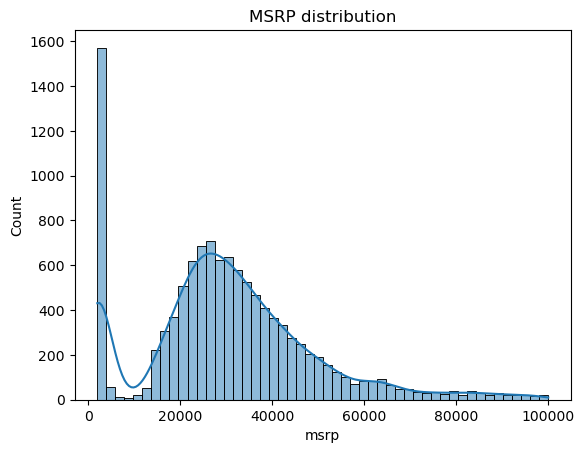

In [11]:
sns.histplot(data.msrp[data.msrp < 100_000], bins=50, kde=True)
plt.title('MSRP distribution')
plt.show()

In [12]:
def log_transform(data:DataFrame, column:str)->DataFrame:
  '''
  Apply a log transformation to a column of a pandas DataFrame
  Args:
    data: a pandas DataFrame
    column: the column to apply the log transformation
  Returns:
    DataFrame: a pandas DataFrame
  '''
  data[column] = np.log1p(data[column])
  return data

In [13]:
msrp_log_val = log_transform(data, 'msrp')

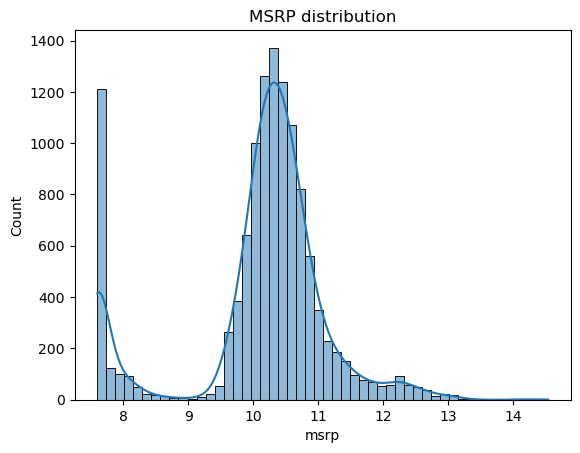

In [14]:
sns.histplot(msrp_log_val.msrp, bins=50, kde=True)
plt.title('MSRP distribution')
plt.show()

In [15]:
def missing_values(data:DataFrame)->DataFrame:
  '''
  Check for missing values in a pandas DataFrame
  Args:
    data: a pandas DataFrame
  Returns:
    DataFrame: a pandas DataFrame
  '''
  return data.isnull().sum()

In [16]:
missing_values(data)

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [30]:
data.number_of_doors.unique()

array([ 2.,  4.,  3., nan])

### Setting up a validation framework

In [17]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.25, random_state=42)  

In [18]:
print(f"Train size: {len(train_data)}")
print(f"Validation size: {len(val_data)}")
print(f"Test size: {len(test_data)}")

Train size: 7148
Validation size: 2383
Test size: 2383


In [19]:
train_data.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
3972,mitsubishi,endeavor,2011,premium_unleaded_recommended,225.0,6.0,automatic,all_wheel_drive,4.0,crossover,midsize,4dr_suv,19,15,436,10.422281
1997,kia,borrego,2009,regular_unleaded,276.0,6.0,automatic,rear_wheel_drive,4.0,NaN,midsize,4dr_suv,21,17,1720,10.175269
5216,lamborghini,gallardo,2012,premium_unleaded_required,570.0,10.0,manual,all_wheel_drive,2.0,"exotic,factory_tuner,high-performance",compact,convertible,20,12,1158,12.421188
2805,chevrolet,colorado,2016,regular_unleaded,200.0,4.0,automatic,rear_wheel_drive,4.0,diesel,compact,crew_cab_pickup,27,20,1385,10.126271
11369,pontiac,vibe,2009,regular_unleaded,158.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,26,20,210,9.927009


In [20]:
val_data.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
1918,volkswagen,beetle,2015,premium_unleaded_recommended,210.0,4.0,manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,31,23,873,10.263816
9951,audi,sq5,2015,premium_unleaded_required,354.0,6.0,automatic,all_wheel_drive,4.0,"crossover,factory_tuner,luxury,high-performance",midsize,4dr_suv,24,17,3105,11.005444
5486,pontiac,grand_am,2005,regular_unleaded,140.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,31,22,210,9.908027
292,nissan,350z,2009,regular_unleaded,306.0,6.0,manual,rear_wheel_drive,2.0,high-performance,compact,convertible,24,17,2009,10.576968
3644,ford,e-150,1996,regular_unleaded,199.0,6.0,automatic,rear_wheel_drive,3.0,NaN,midsize,passenger_van,15,11,5657,7.601402


In [21]:
test_data.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
3995,gmc,envoy_xl,2005,regular_unleaded,275.0,6.0,automatic,rear_wheel_drive,4.0,NaN,large,4dr_suv,18,13,549,10.298768
7474,volkswagen,passat,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,38,25,873,10.325351
7300,honda,odyssey,2016,regular_unleaded,248.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,28,19,2202,10.536115
3148,chevrolet,cruze,2015,regular_unleaded,138.0,4.0,manual,front_wheel_drive,4.0,NaN,midsize,sedan,36,25,1385,9.690975
747,volvo,740,1991,regular_unleaded,162.0,4.0,automatic,rear_wheel_drive,4.0,"luxury,performance",midsize,sedan,20,17,870,7.601402


In [22]:
y_train = np.log1p(train_data['msrp'])
y_val = np.log1p(val_data['msrp'])
y_test = np.log1p(test_data['msrp'])

In [23]:
del train_data['msrp']
del val_data['msrp']
del test_data['msrp']

In [24]:
X_train = train_data
X_val = val_data
X_test = test_data

In [25]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7148 entries, 3972 to 10286
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               7148 non-null   object 
 1   model              7148 non-null   object 
 2   year               7148 non-null   int64  
 3   engine_fuel_type   7146 non-null   object 
 4   engine_hp          7108 non-null   float64
 5   engine_cylinders   7133 non-null   float64
 6   transmission_type  7148 non-null   object 
 7   driven_wheels      7148 non-null   object 
 8   number_of_doors    7144 non-null   float64
 9   market_category    4905 non-null   object 
 10  vehicle_size       7148 non-null   object 
 11  vehicle_style      7148 non-null   object 
 12  highway_mpg        7148 non-null   int64  
 13  city_mpg           7148 non-null   int64  
 14  popularity         7148 non-null   int64  
dtypes: float64(3), int64(4), object(8)
memory usage: 893.5+ KB


In [27]:
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'mitsubishi'